<a href="https://colab.research.google.com/github/simonsavine/phasetype/blob/main/neural_estimation_exponential.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Normalization

In [2]:
# simulate dataset

num_examples = 262144

# num samples per example
sample_size = 1024

# for each example, we draw random parameters, shape = (num_examples, num_parameters)
# here, we have only one parameter, the exponential rate, num_parameters = 1
rates = np.random.uniform(size = (num_examples, 1))

# for each rate parameter, simulate a sample
# shape = (num_examples, sample_size)
samples = np.array([np.random.exponential(scale = 1 / rate, size = sample_size) for rate in rates])

# dataset
xs = samples
ys = rates

# split
xs_train, xs_val, ys_train, ys_val = train_test_split(xs, ys, test_size=0.1)

In [5]:
# save dataset
np.save("/content/drive/MyDrive/phase_type_data/expo_262k_xs_train.npy", xs_train)
np.save("/content/drive/MyDrive/phase_type_data/expo_262k_ys_train.npy", ys_train)
np.save("/content/drive/MyDrive/phase_type_data/expo_262k_xs_val.npy", xs_val)
np.save("/content/drive/MyDrive/phase_type_data/expo_262k_ys_val.npy", ys_val)

In [2]:
# load dataset

if False:
  loaded_xs_train = np.load("/content/drive/MyDrive/phase_type_data/expo_262k_xs_train.npy")
  assert np.allclose(loaded_xs_train, xs_train)

  loaded_ys_train = np.load("/content/drive/MyDrive/phase_type_data/expo_262k_ys_train.npy")
  assert np.allclose(loaded_ys_train, ys_train)

  loaded_xs_val = np.load("/content/drive/MyDrive/phase_type_data/expo_262k_xs_val.npy")
  assert np.allclose(loaded_xs_val, xs_val)

  loaded_ys_val = np.load("/content/drive/MyDrive/phase_type_data/expo_262k_ys_val.npy")
  assert np.allclose(loaded_ys_val, ys_val)

else:
  xs_train = np.load("/content/drive/MyDrive/phase_type_data/expo_262k_xs_train.npy")
  ys_train = np.load("/content/drive/MyDrive/phase_type_data/expo_262k_ys_train.npy")
  xs_val = np.load("/content/drive/MyDrive/phase_type_data/expo_262k_xs_val.npy")
  ys_val = np.load("/content/drive/MyDrive/phase_type_data/expo_262k_ys_val.npy")

In [3]:
# check dataset
num_examples = xs_train.shape[0]
sample_size = xs_train.shape[1]
xs_train.shape, ys_train.shape, xs_val.shape, ys_val.shape

((235929, 1024), (235929, 1), (26215, 1024), (26215, 1))

In [4]:
# build a neural network for learning the function sample -> rate, i.e. x -> y
model = Sequential([
    Input((sample_size,)),
    Normalization(mean=np.mean(xs_train, axis=0), variance=np.var(xs_train, axis=0)),
    Dense(16, activation="relu"),
    Dense(16, activation="relu"),
    Dense(1)
])

In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ normalization (Normalization)        │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 16)                  │          16,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,689 (65.19 KB)

 Trainable params: 16,689 (65.19 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
model.compile(optimizer="adam", loss="mse")

In [7]:
model.fit(xs_train, ys_train, batch_size=128, epochs=20, validation_data=(xs_val, ys_val))

Epoch 1/20
1844/1844 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.1970 - val_loss: 0.0092
Epoch 2/20
1844/1844 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 6.5805 - val_loss: 0.5212
Epoch 3/20
1844/1844 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 59.6612 - val_loss: 3.3759
Epoch 4/20
1844/1844 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 202.8881 - val_loss: 2.7378
Epoch 5/20
1844/1844 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 8.0262 - val_loss: 0.0372
Epoch 6/20
1844/1844 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.6908 - val_loss: 0.0412
Epoch 7/20
1844/1844 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.6693 - val_loss: 0.0552
Epoch 8/20
1844/1844 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 3.5873 - val_loss: 0.0777
Epoch 9/20
1844/1844 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 3.4466 - val_loss: 0.0215
Epoch 10/20
1844/1844 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 1.9873 - val_loss: 8.0966e-04
Epoch 11/20
1844/1844 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0012 - val_loss: 7.4541e-04
Epoch 12/20
1844/

In [9]:
# save trained model
model.save("/content/drive/MyDrive/phase_type_data/expo_262k_nn.keras")

In [10]:
# load trained model
# model = tf.keras.models.load_model('/content/drive/MyDrive/phase_type_data/expo_262k_nn.keras')


In [12]:
# sanity check
# rates = 0.1, 0.2, ..., 0.9
rates = np.linspace(0, 1, 11)[1:-1]
for rate in rates:
  new_sample = np.random.exponential(scale=1/rate, size = (10, sample_size))
  preds = model.predict(new_sample, verbose=False)
  print (rate, preds.mean(), preds.std() / np.sqrt(10))

0.1 0.10201405 0.0023988913231400857
0.2 0.20722553 0.0024039482080774393
0.30000000000000004 0.30427343 0.002766142713892564
0.4 0.4091475 0.0038303347789431607
0.5 0.49813098 0.006510951183201332
0.6000000000000001 0.59887093 0.0040537185957678365
0.7000000000000001 0.6901578 0.010839203513510259
0.8 0.81277734 0.009588929391951249
0.9 0.8902892 0.00834718310360886


In [15]:
# all examples are within (0, 1) -- the ANN cannot predict rates outside this range
rate = 2
new_sample = np.random.exponential(scale=1/rate, size = (10, sample_size))
preds = model.predict(new_sample, verbose=False)
print (rate, preds.mean(), preds.std() / np.sqrt(10))

2 1.0926079 0.0015136151486307983


In [16]:
def estimate_mle(sample):
  return 1 / sample.mean()

def estimate_neural_net(sample):
  # neural network expects samples of size sample_size, we split our sample into subsamples of this size and average
  assert sample.size >= sample_size, "sample is too small"
  sample = sample.reshape([-1, sample_size])
  assert sample.size > 0
  preds = model.predict(sample, verbose=False)
  return preds.mean()


In [17]:
rates = np.linspace(0, 1, 11)[1:-1]
sz = 10 * sample_size
for rate in rates:
  sample = np.random.exponential(scale=1/rate, size = sz)
  print(rate, estimate_mle(sample), estimate_neural_net(sample))

0.1 0.099402268656206 0.10084502
0.2 0.19626893865800055 0.20193867
0.30000000000000004 0.3018828720186022 0.3101764
0.4 0.4016998622157815 0.40825883
0.5 0.5000773138802372 0.5132423
0.6000000000000001 0.6000686475318331 0.6021092
0.7000000000000001 0.6988424352685001 0.6963624
0.8 0.8001611052698674 0.8085071
0.9 0.9032026433250355 0.89061844


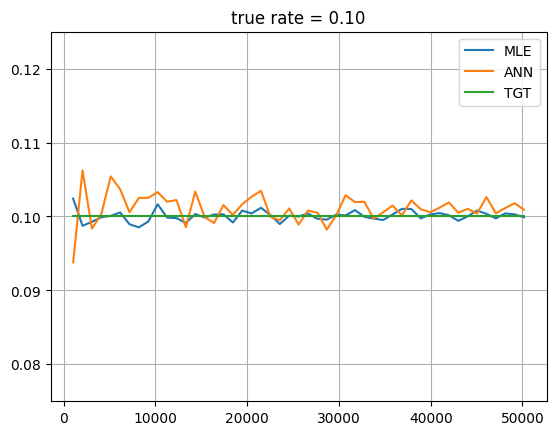

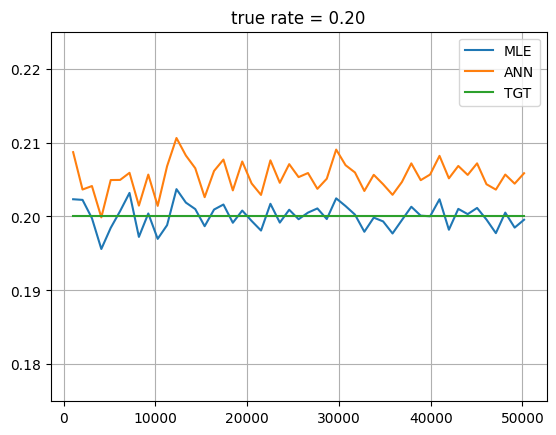

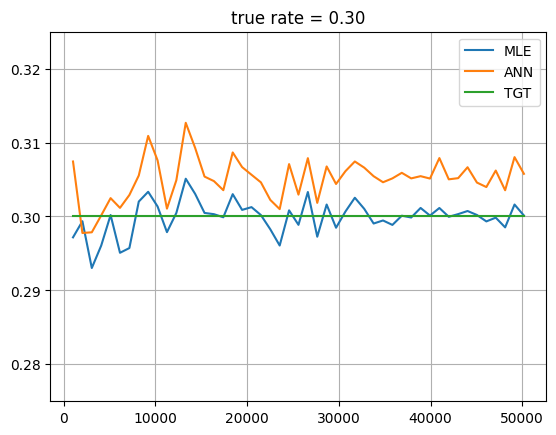

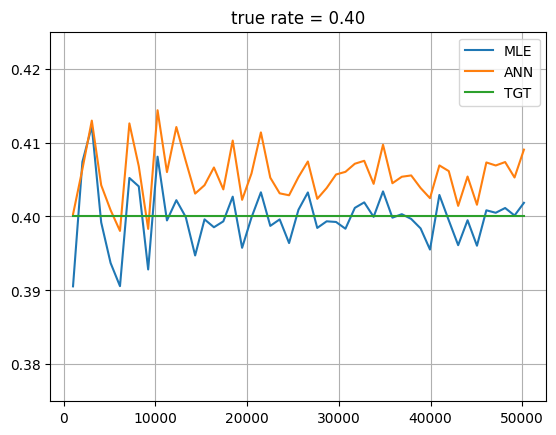

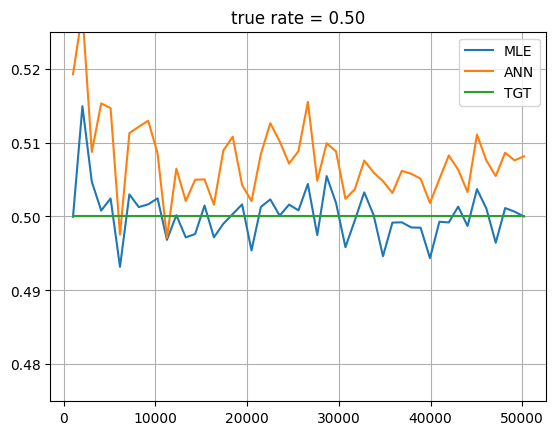

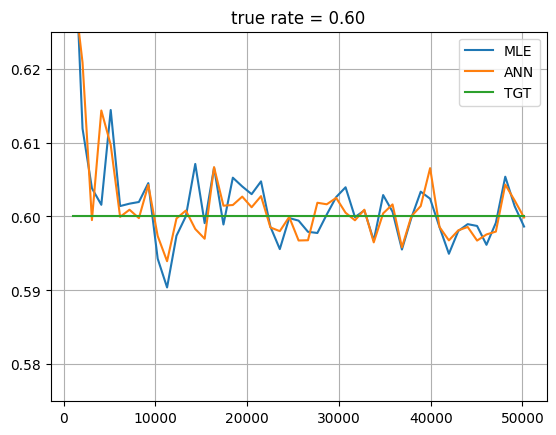

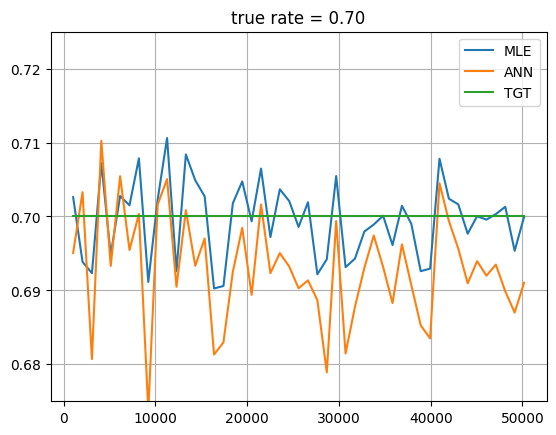

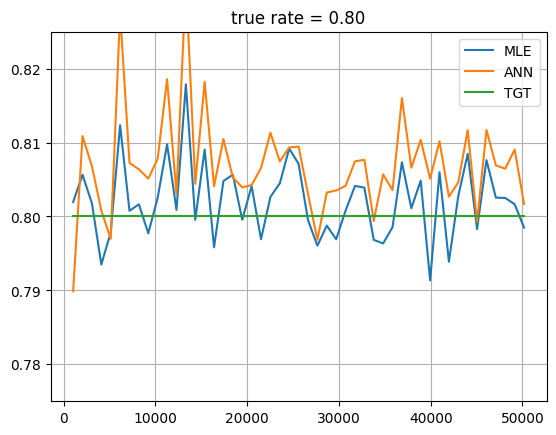

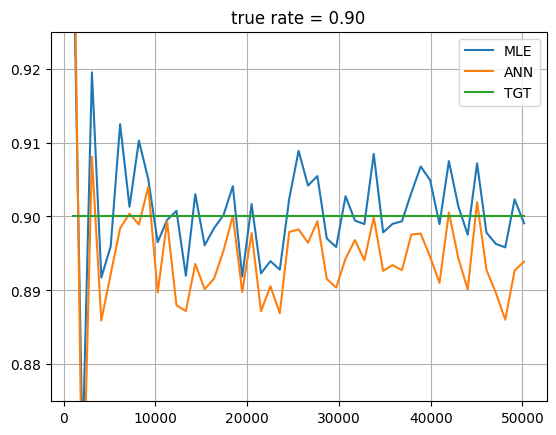

In [19]:
for rate in rates:

  sizes=[]
  mles = []
  nests = []
  for szm in range(1, 50):
    sz = szm * sample_size
    sizes.append(sz)
    sample = np.random.exponential(scale=1/rate, size = sz)
    mles.append(estimate_mle(sample))
    nests.append(estimate_neural_net(sample))

  plt.figure()
  plt.plot(sizes, mles, label="MLE" )
  plt.plot(sizes, nests, label="ANN" )
  plt.plot(sizes, np.ones_like(sizes) * rate, label="TGT" )

  plt.ylim((rate-0.025, rate+0.025))
  plt.grid()
  plt.legend()
  plt.title(f"true rate = {rate:.2f}")
  plt.show()